In [1]:
import pandas as pd
from scipy.spatial.distance import cosine
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

data = np.load('matrix.npy').item()
# X = np.load('norm_data/matrix.npy').item()
artist = np.load('artist.npy')
customer_id = np.load('customer.npy')
data_artist_key = np.load('key.npy').item()
data_artist_val = np.load('val.npy').item()


item_sim = cosine_similarity(data,data)
item_df = pd.DataFrame(item_sim,index=artist,columns=artist)


In [2]:
print('input a number')
ip = artist[int(input())]
# ip = 'Linkin Park'
print('find artist similar to', ip)

related = list(item_df[ip].nlargest(11)[1:].reset_index()['index'])
print('similar artists:',related)

genres = np.load('top100artistgenres.npy').item()

count = 0
ip_gen = genres[ip]
for j in related:
    for i in genres[j]:
        if i in ip_gen:
            count+=1
            break
print('accuracy:',count/10)

input a number
1
find artist similar to Muse
similar artists: ['Radiohead', 'Biffy Clyro', 'Red Hot Chili Peppers', 'My Chemical Romance', 'Linkin Park', 'Royal Blood', 'Green Day', 'Pendulum', 'Avenged Sevenfold', 'Gorillaz']
accuracy: 1.0


In [3]:
print(','.join(related))

Radiohead,Biffy Clyro,Red Hot Chili Peppers,My Chemical Romance,Linkin Park,Royal Blood,Green Day,Pendulum,Avenged Sevenfold,Gorillaz


In [4]:
#calculate accuracy of the model

In [5]:
count = 0
for ip in artist:
    ip_gen = genres[ip]
    related = list(item_df[ip].nlargest(11)[1:].reset_index()['index'])
    for j in related:
        for i in genres[j]:
            if i in ip_gen:
                count+=1
                break
print('model accuracy:',count/1000)

model accuracy: 0.799


In [6]:
artist[0]

'Linkin Park'

In [7]:
score_list = []

for num_pred in range(1,100):
    count = 0
    for ip in artist:
        related = list(item_df[ip].nlargest(num_pred+1)[1:].reset_index()['index'])
        ip_gen = genres[ip]
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    count+=1
                    break
    score_list.append(count/(100*num_pred))

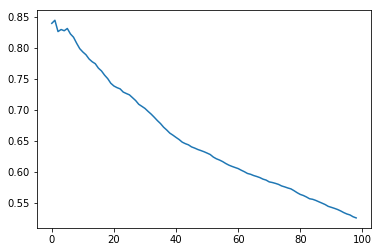

In [8]:
import matplotlib.pyplot as plt

plt.plot(score_list)
plt.show()

In [9]:
np.save('item_eval.npy',score_list)

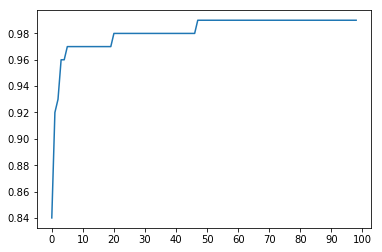

In [10]:
score_list = []

for num_pred in range(1,100):
    count = 0
    for ip in artist:
        related = list(item_df[ip].nlargest(num_pred+1)[1:].reset_index()['index'])
        ip_gen = genres[ip]
        correct = 0
        for j in related:
            for i in genres[j]:
                if i in ip_gen:
                    correct = 1
        count += correct
    score_list.append(count/(100))
plt.xticks(np.arange(0, 101, 10))
plt.plot(score_list)
plt.show()

In [11]:
np.save('item_acc.npy', score_list)